In [1]:
# Loading in model + model inspection/summary
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
from PIL import Image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
import os


data_dir = os.path.join("..","Data")

# Function to prepare image for model input
def prepare_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path).convert("RGB")
    img = img.resize(target_size)

    img_array = np.array(img, dtype=np.float32)
    img_batch = np.expand_dims(img_array, axis=0)
    img_batch = preprocess_input(img_batch)

    return img, img_batch


# Preparing images
cat_image, cat_input = prepare_image(os.path.join(data_dir, "cat_scottishfold.jpg"))
dog_image, dog_input = prepare_image(os.path.join(data_dir, "golden_retriever.jpg"))
sloth_image, sloth_input = prepare_image(os.path.join(data_dir, "sloth.jpg"))

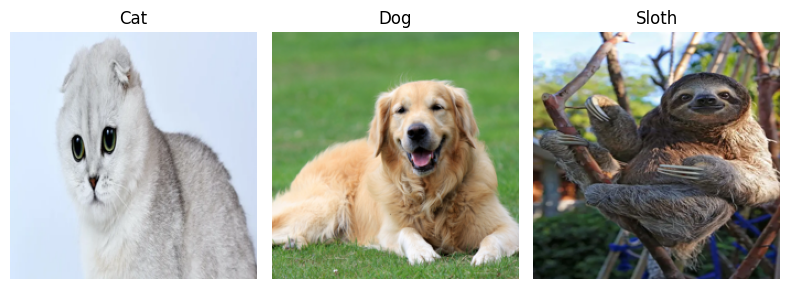

In [3]:
import matplotlib.pyplot as plt

# Sanity check - display images
plt.figure(figsize=(8, 3))

for i, (title, img) in enumerate([
    ("Cat", cat_image),
    ("Dog", dog_image),
    ("Sloth", sloth_image),
]):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [4]:
# Freezing the model for feature extraction
from tensorflow.keras.applications import VGG16

conv_model = VGG16(weights="imagenet", include_top=False)
conv_model.trainable = False

conv_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [5]:
# Shallow, mid, and deep layers
layer_names = [
    "block1_conv1",
    "block3_conv1",
    "block5_conv1"
]

In [6]:
# Activation model
from tensorflow.keras.models import Model

layer_outputs = [conv_model.get_layer(name).output for name in layer_names]
activation_model = Model(inputs=conv_model.input, outputs=layer_outputs)

In [7]:
cat_image_activations = activation_model.predict(cat_input)
dog_image_activations = activation_model.predict(dog_input)
sloth_image_activations = activation_model.predict(sloth_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [8]:
# for layer_name, act in zip(layer_names, cat_image_activations):
#     print(layer_name, act.shape)


In [9]:
def plot_activations_subset(activations, layer_names, max_filters=8):
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = min(layer_activation.shape[-1], max_filters)
        size = layer_activation.shape[1]

        display_grid = np.zeros((size, size * n_features))

        for i in range(n_features):
            channel_image = layer_activation[0, :, :, i].copy()
            channel_image -= channel_image.mean()
            channel_image /= (channel_image.std() + 1e-5)
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")

            display_grid[:, i * size : (i + 1) * size] = channel_image

        plt.figure(figsize=(n_features * 2, 2))
        plt.title(layer_name)
        plt.imshow(display_grid, aspect="auto", cmap="viridis")
        plt.axis("off")
        plt.show()


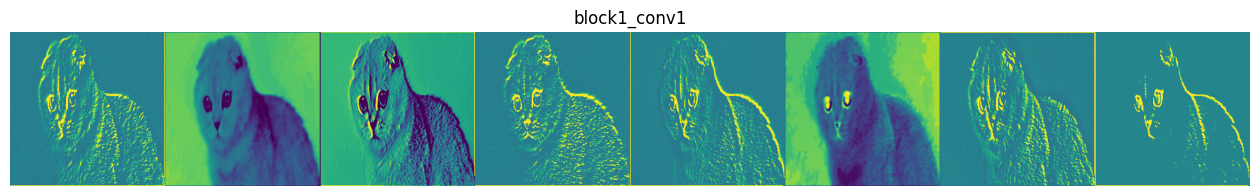

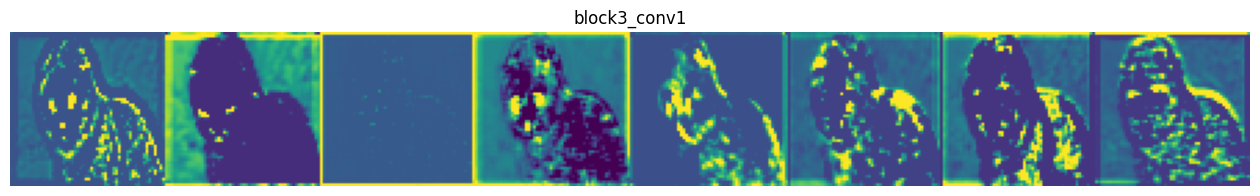

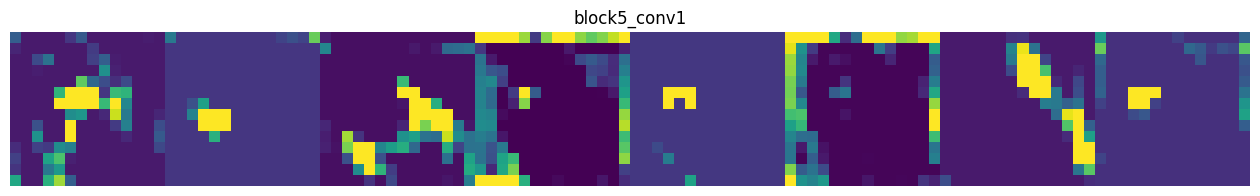

In [10]:
plot_activations_subset(cat_image_activations, layer_names)

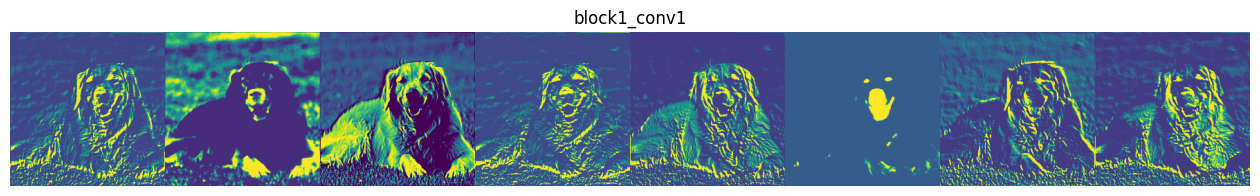

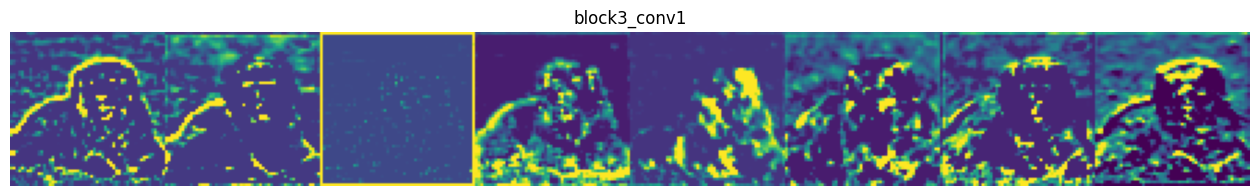

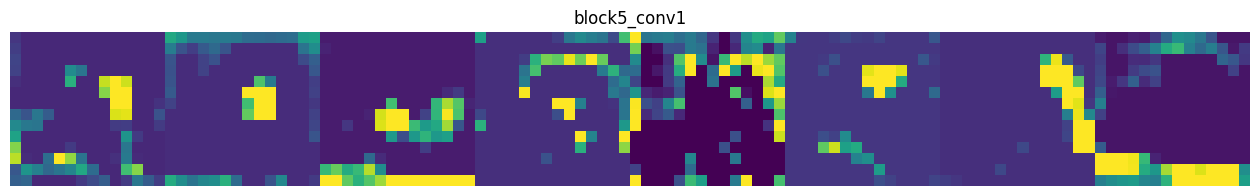

In [11]:
plot_activations_subset(dog_image_activations, layer_names)

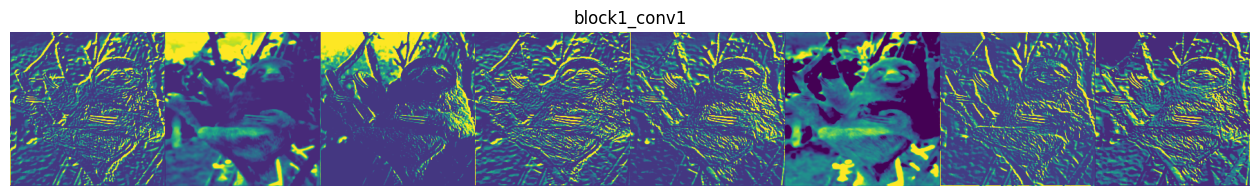

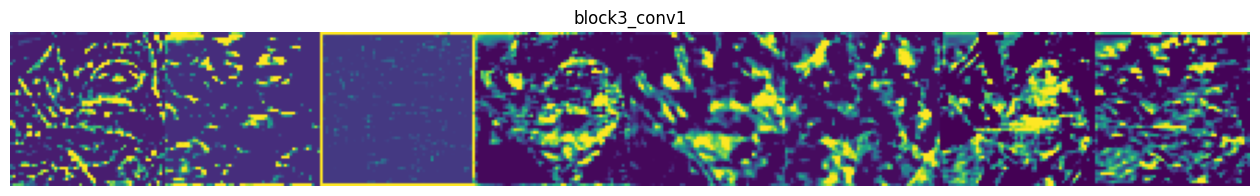

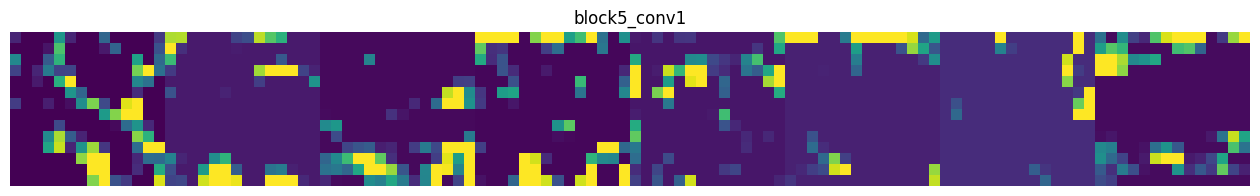

In [12]:
plot_activations_subset(sloth_image_activations, layer_names)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_top_filters_big_subplot(
    activations_dict, layer_names, top_n=2
):
    """
    One big subplot with the same titles as the original function.
    
    Rows  -> images (Cat, Dog, Sloth)
    Cols  -> layers
    """

    image_labels = list(activations_dict.keys())
    num_images = len(image_labels)
    num_layers = len(layer_names)

    fig, axes = plt.subplots(
        nrows=num_images,
        ncols=num_layers,
        figsize=(num_layers * top_n * 2.2, num_images * 2.5),
        squeeze=False
    )

    for row, image_label in enumerate(image_labels):
        activations = activations_dict[image_label]

        for col, (layer_name, layer_activation) in enumerate(zip(layer_names, activations)):
            # Mean activation per filter
            mean_activations = layer_activation.mean(axis=(0, 1, 2))
            top_indices = mean_activations.argsort()[-top_n:][::-1]

            size = layer_activation.shape[1]
            display_grid = np.zeros((size, size * top_n))

            for i, filter_idx in enumerate(top_indices):
                channel_image = layer_activation[0, :, :, filter_idx].copy()
                channel_image -= channel_image.mean()
                channel_image /= (channel_image.std() + 1e-5)
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype("uint8")

                display_grid[:, i * size:(i + 1) * size] = channel_image

            ax = axes[row, col]
            ax.imshow(display_grid, cmap="viridis", aspect="auto")
            ax.axis("off")

            # SAME title style as original
            ax.set_title(f"{image_label} – {layer_name} (top {top_n} filters)", fontsize=9)

    plt.tight_layout()
    plt.show()


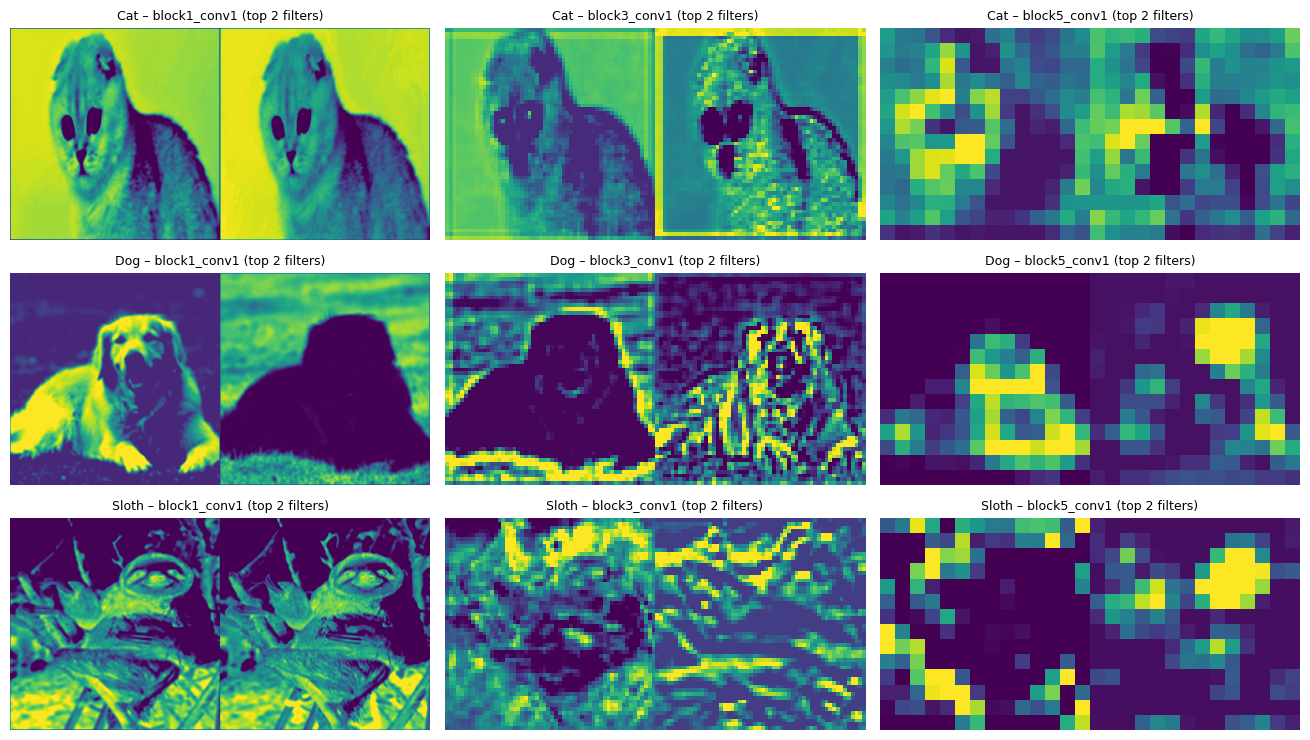

In [20]:
activations_dict = {
    "Cat": cat_image_activations,
    "Dog": dog_image_activations,
    "Sloth": sloth_image_activations
}

plot_top_filters_big_subplot(activations_dict, layer_names, top_n=2)
